# Bike Sharing Problem - Multiple Linear Regression

## Problem Statement:

A US bike-sharing company BoomBikes , provides a bike sharing service, on which user can rent a bike from the dock station after making payment. After usage , user can return the bike to another dock system.

Company has recently seen dip in their revenues due to ongoing Corona pandemic. So company has decided to come up the business plan to be able to sustain and increase revenue as soon as lockdown is over. The company wants to know:

- Which Variables are significant in predicting the demand for shared bikes.

- How well those variables describe the bike demands


The steps we will follow are as follows:
1. Reading and understanding the data
2. Data Visualisation
3. Preparing the data for modelling
4. Building and Training the model
5. Residual Analysis
6. Predictions and evaluations on the test set

### Step 1 : Reading and understanding the data

Let us first import all the required libraries and read the dataset.

In [356]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [357]:
# read the data
bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [358]:
bike.shape

(730, 16)

In [359]:
# check for missing values
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no missing values. So we are good to move to next step.

#### Understanding the data dictionary

In [360]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


We find that except dteday , all variables are of type int/float. Our approach would be as follow:
1. Remove unwanted columns
2. Typecast to categorical column


#### Remove unwanted columns
**1. instant** : This is record index. It is not needed so we can delete this. 

**2. dteday** : This contains date but we already have mnth and yr columns separetly, so we can remove this column

**3. casual and registered** : Total of casual and registered is equal to cnt. And in final outcome we will only require cnt. so we can remove both casual and registered.


In [361]:
# drop the columns
bike.drop(["instant","dteday","casual","registered"],axis=1,inplace=True)

In [362]:
# Lets look into the data again.
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### Converting to categorical variable

Assign the string values to season, mnth, weekday, weathersit

In [363]:
# Assigining string values to season
col = ['season']
bike[col] = bike[col].apply(lambda x:x.map({1:'spring',2:'summer',3:'fall',4:'winter'}))

In [364]:
# lets check if assignment is done correctly
bike.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [365]:
# Assigning string values to mnth
col = ['mnth']
bike[col] = bike[col].apply(lambda x:x.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'}))

In [366]:
# lets verify the assignment
bike.mnth.value_counts()

jan     62
mar     62
may     62
july    62
aug     62
oct     62
dec     62
apr     60
june    60
sep     60
nov     60
feb     56
Name: mnth, dtype: int64

In [367]:
# Assigning string values to weekday
col = ['weekday']
bike[col] = bike[col].apply(lambda x:x.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'}))

In [368]:
# lets verify the assignment
bike.weekday.value_counts()

sat    105
sun    105
mon    105
tue    104
thu    104
fri    104
wed    103
Name: weekday, dtype: int64

In [369]:
# Assigning string values to weathersit
col = ['weathersit']
bike[col] = bike[col].apply(lambda x:x.map({1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'}))

In [370]:
# lets verify the assignment
bike.weathersit.value_counts()

Clear         463
Mist          246
Light Snow     21
Name: weathersit, dtype: int64

In [371]:
# Lets look into the data after string values assignment
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [372]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


Now, data looks OK. So lets move to data visualisation step.

### Step 2 : Data Visualisation

Lets first try to visualize the data using sweetviz package, it automatically generates the visualisation for all fields and list down our findings.



In [373]:
!pip install sweetviz
import sweetviz as sv 
sweet_report = sv.analyze(bike) 
sweet_report.show_html('sweet_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


**Findings from sweetviz**:

1. temp and atemp variables are highly correlated with each other having coefficent of 0.99. 
2. temp variable are directly coorelated with cnt with coefficent of 0.63
2. mnth variable is directly coorelated with cnt with coefficent of 0.62
3. There are almost negligible impact of weekday, holiday and workingday variables on cnt.

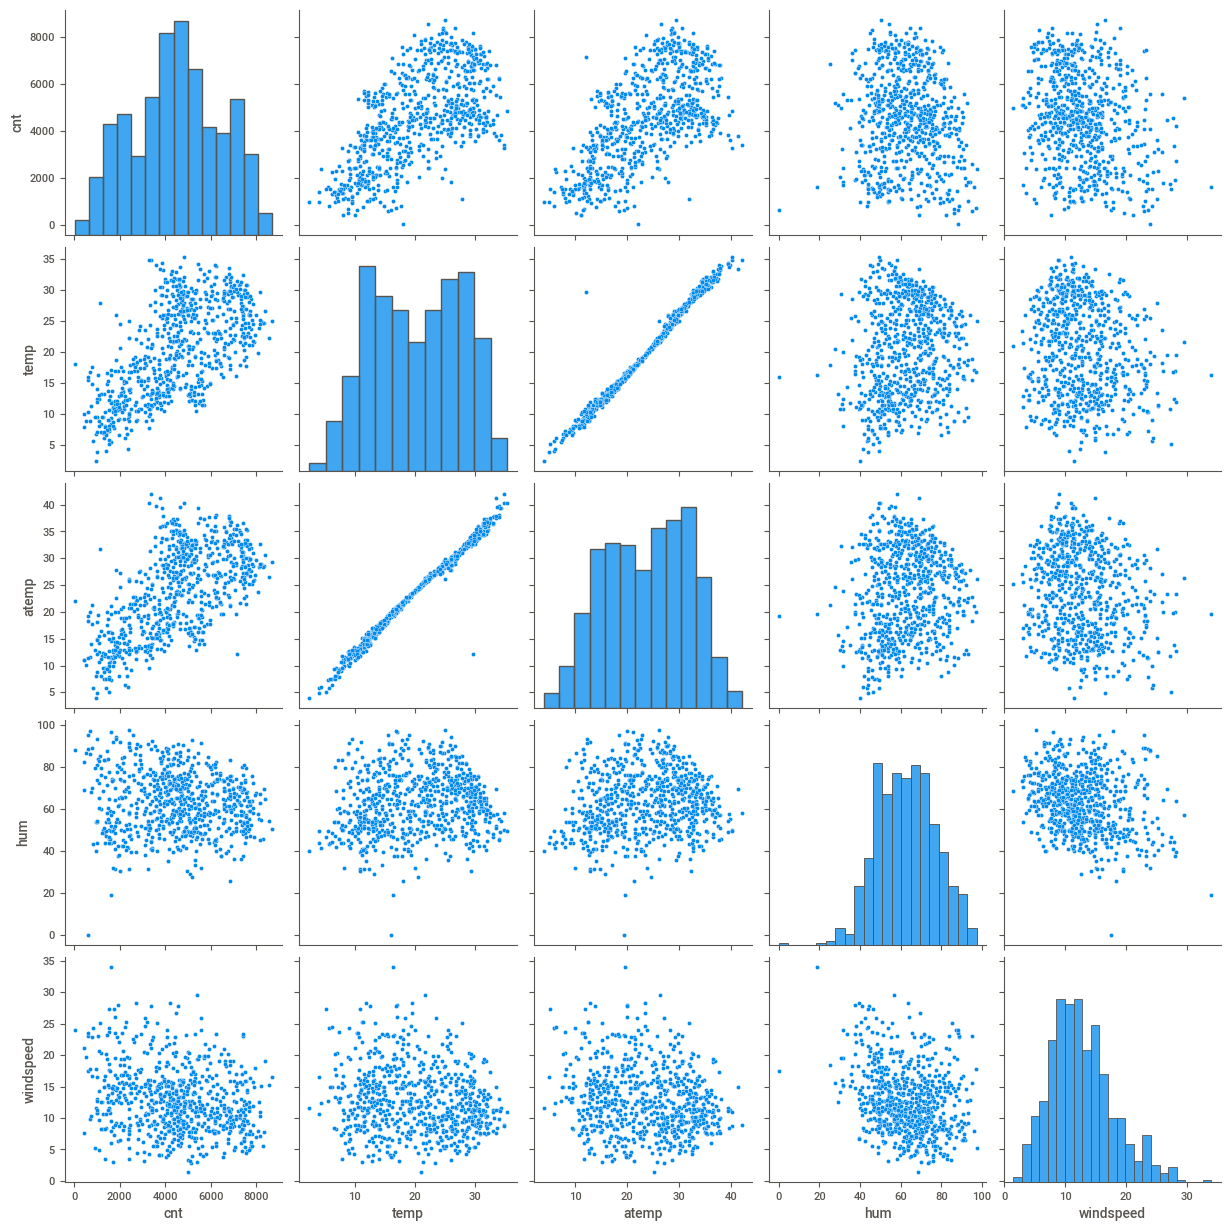

In [374]:
# Visualisting the numerical variables
sns.pairplot(bike[["cnt","temp","atemp","hum","windspeed"]])
plt.show()

**Findings :**

1. We can notice that there is linear relation between temp and cnt variable, which tells us that we can use Linear Regression.
2. temp and atemp variables has high correlation and is redundant. It is recommended to remove one of the column while bulding model.

In [375]:
# We are going to add new column year only for Data visualisation purpose, after visualising we will delete. New column will help us to show the trend easily. 0 is for 2018, 1 for 2019.
bike["year"] = bike.yr+2018

In [376]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year
0,spring,0,jan,0,sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985,2018
1,spring,0,jan,0,sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801,2018
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,2018
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,2018
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,2018


<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

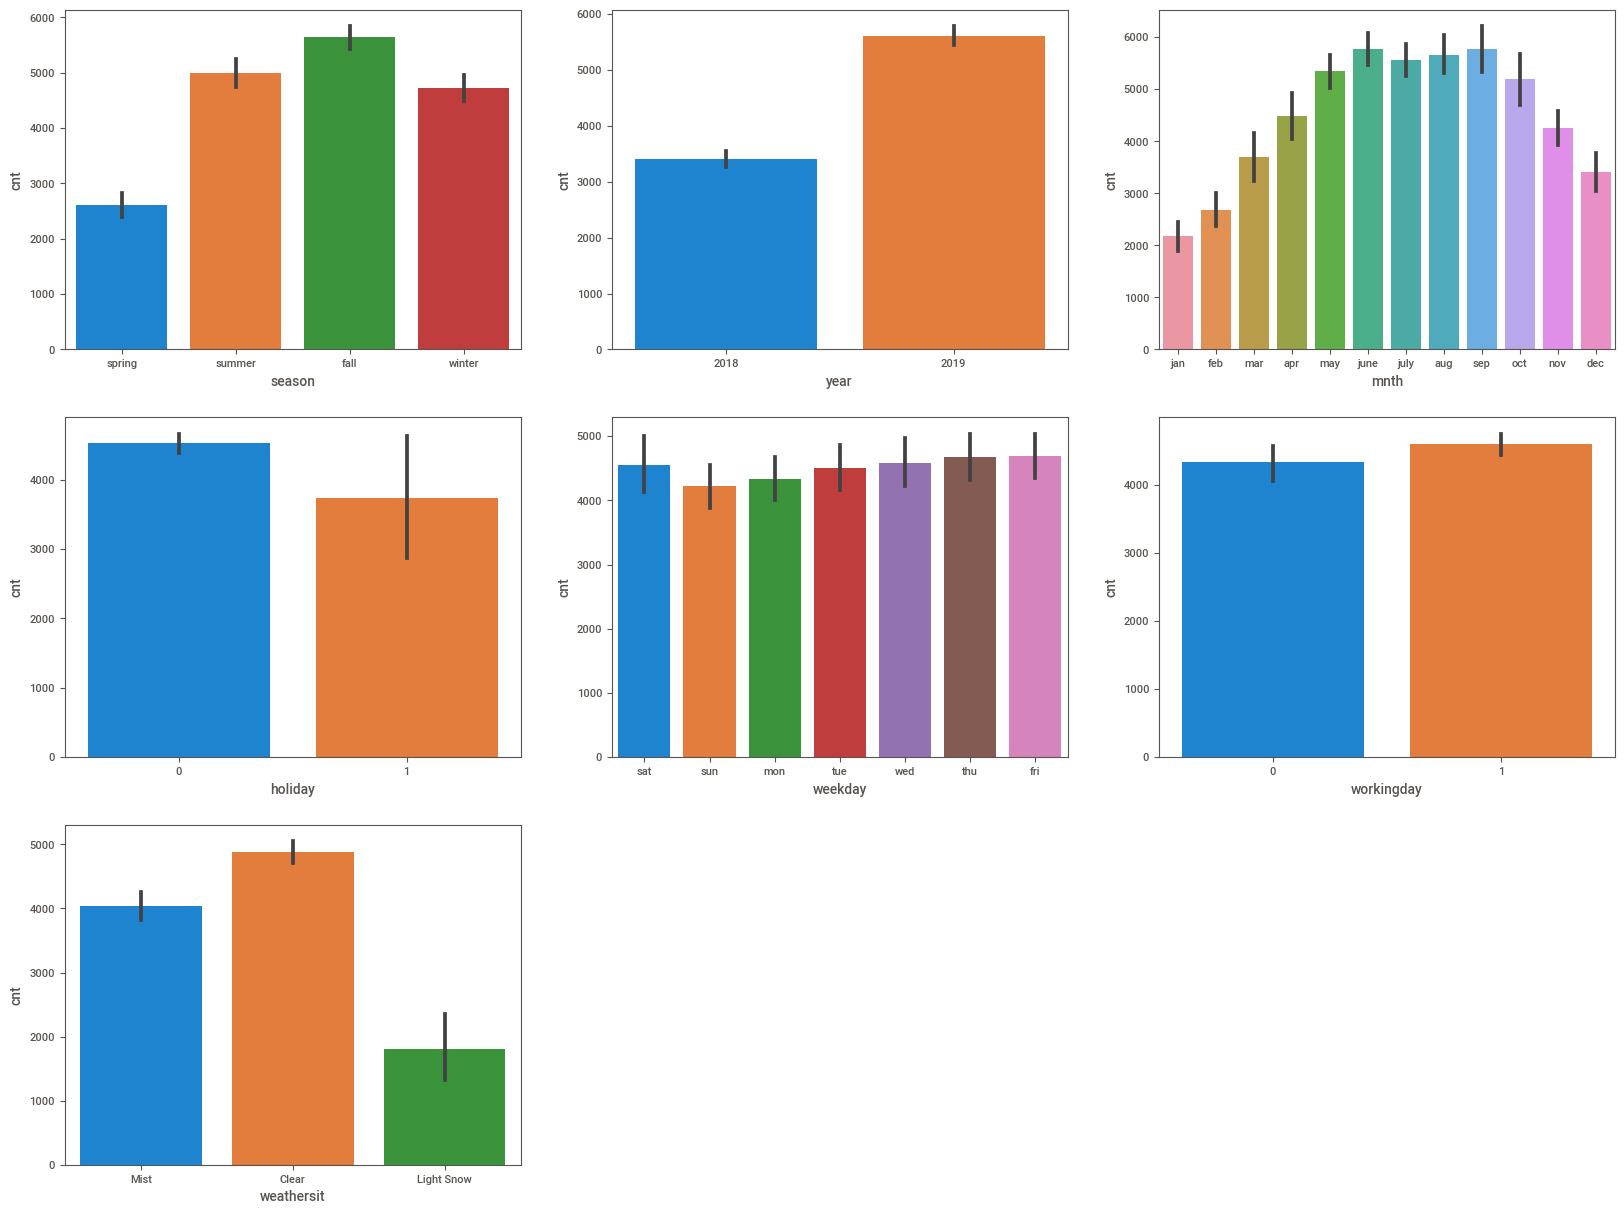

In [377]:
# visualise the categorical variable [season,yr,mnth,holiday,weekday,workingday,weathersit]
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.barplot(x='season',y='cnt',data=bike)

plt.subplot(3,3,2)
sns.barplot(x='year',y='cnt',data=bike)

plt.subplot(3,3,3)
sns.barplot(x='mnth',y='cnt',data=bike)

plt.subplot(3,3,4)
sns.barplot(x='holiday',y='cnt',data=bike)

plt.subplot(3,3,5)
sns.barplot(x='weekday',y='cnt',data=bike)

plt.subplot(3,3,6)
sns.barplot(x='workingday',y='cnt',data=bike)

plt.subplot(3,3,7)
sns.barplot(x='weathersit',y='cnt',data=bike)

**Findings :**

1. In Fall seasons, there are more bookings.
2. Bookings has increased year on year.
3. There is some trend in month wise bookings. In first and last few months, booking are less. Generally bookings are higher during months of May to Oct.
4. On holiday, there seems to be less booking.
5. As weekend approaches, there is slight rise in bookings.
6. There is marginal rise in booking on working day.
7. On Clear weather , there are more bookings.

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

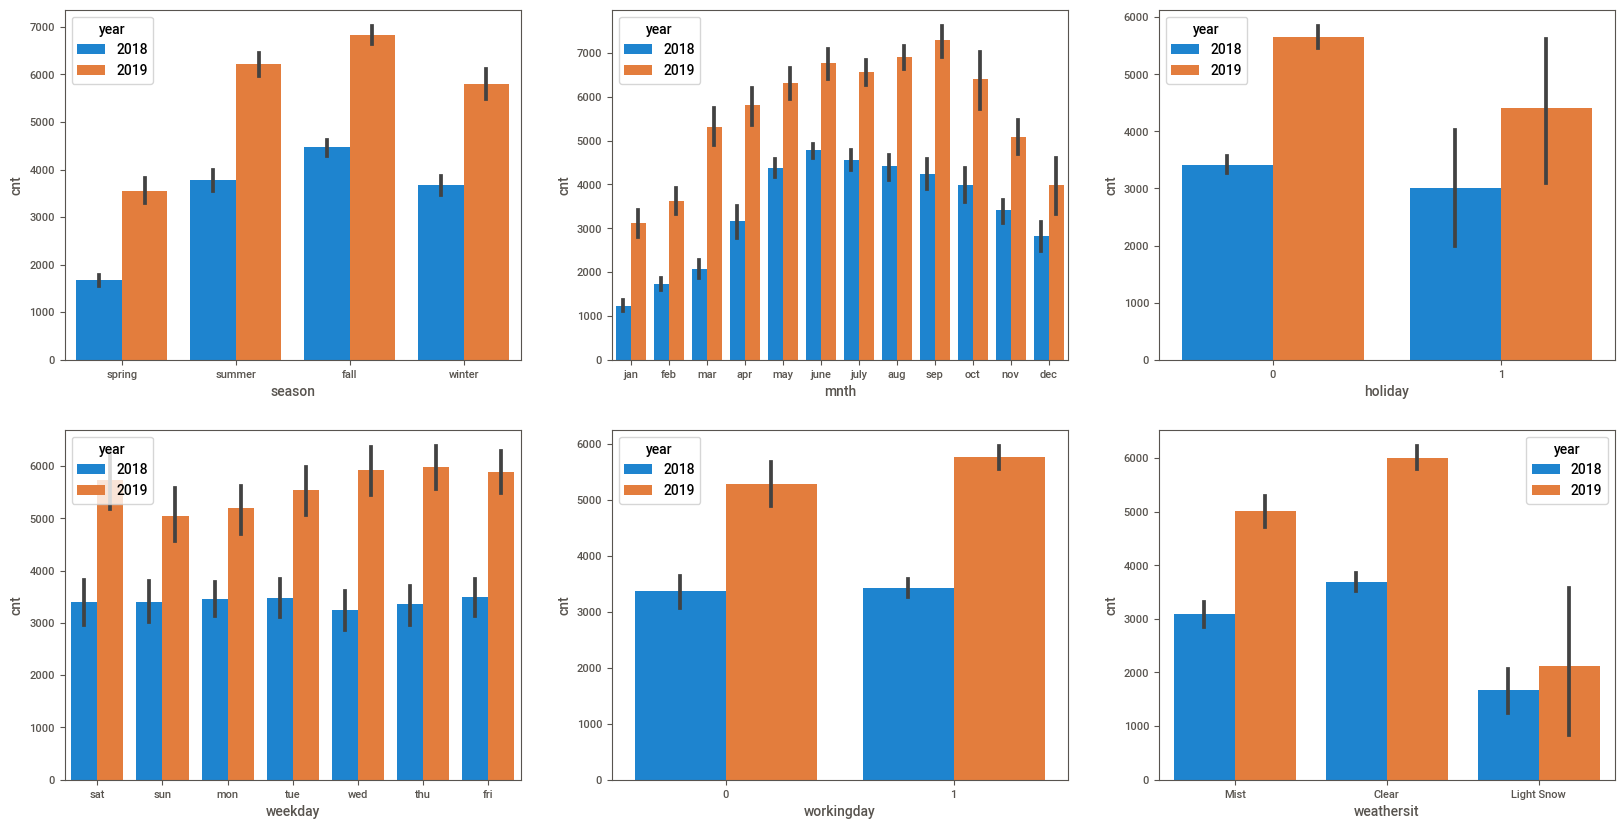

In [378]:
# Lets plot categorical variables by year

plt.figure(figsize=(20,10))
year = ['2018','2019']

plt.subplot(2,3,1)
sns.barplot('season','cnt',data=bike,hue='year')

plt.subplot(2,3,2)
sns.barplot('mnth','cnt',data=bike,hue='year')

plt.subplot(2,3,3)
sns.barplot('holiday','cnt',data=bike,hue='year')

plt.subplot(2,3,4)
sns.barplot('weekday','cnt',data=bike,hue='year')

plt.subplot(2,3,5)
sns.barplot('workingday','cnt',data=bike,hue='year')

plt.subplot(2,3,6)
sns.barplot('weathersit','cnt',data=bike,hue='year')



**Findings :**

1. For each variable, clearly bookings has increased from 2018 to 2019.
2. For each variable, trends for both 2018 and 2019 is same as we saw for each variable in previous part.

<AxesSubplot:>

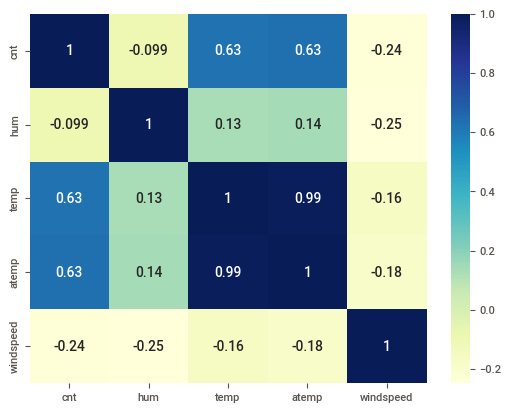

In [379]:
sns.heatmap(bike[["cnt","hum","temp","atemp","windspeed"]].corr(),cmap="YlGnBu", annot=True) 

We can see here, heatmap has given same insights as sweetviz has provided. Since atemp and temp independent variables are highly correlated, we are going to drop atemp. Also , since we have added new column year only for EDA purpose, we are dropping that as well.

In [380]:
bike.drop(["atemp","year"],axis=1, inplace=True)

In [381]:
# Lets take a look into final data set.
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Mist,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Mist,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,43.6957,12.522300,1600


### Step 3 : Preparing the data for modelling




In this step, we will do the encoding of any binary and categorical variables. 

Binary variables like holiday, workingday are already having values in 1/0 form, so no need to encode these.

Other categorical variables - season, mnth,weekday, weathersit , we will be creating dummy variables.



#### Creating Dummy variables

In [382]:
# convert into dummies
bike_dummies = pd.get_dummies(bike[["season","mnth","weekday","weathersit"]],drop_first=True)
bike_dummies.head()

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_june,mnth_mar,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light Snow,weathersit_Mist
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [383]:
# concat the dummy dataset with original dataset
bike = pd.concat([bike , bike_dummies],axis=1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light Snow,weathersit_Mist
0,spring,0,jan,0,sat,0,Mist,14.110847,80.5833,10.749882,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,jan,0,sun,0,Mist,14.902598,69.6087,16.652113,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,jan,0,mon,1,Clear,8.050924,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0


In [384]:
# lets drop the original categorical columns
bike.drop(["season","mnth","weekday","weathersit"],axis=1, inplace=True)
bike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light Snow,weathersit_Mist
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


Encoding part is done now. We can move to building the model step now

### Step 4 : Building and Training the model


In this section we will be doing following 2 things:-

1. Splitting the data into train and test
2. Rescaling the variables
3. Model building using all Features
4. Model building using RFE

#### Splitting the data into train and test :-


In [385]:
df_train,df_test = train_test_split(bike, train_size=0.7, random_state=100)


In [386]:
df_train

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light Snow,weathersit_Mist
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,10.489153,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,0,1,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,13.803347,72.9583,14.707907,1683,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,30.852500,65.9583,8.666718,7261,0,0,0,...,0,0,0,0,0,1,0,0,0,0
53,0,0,1,9.091299,42.3043,6.305571,1917,1,0,0,...,0,0,0,0,0,0,0,1,0,0
350,0,0,0,10.591653,56.0833,16.292189,2739,0,0,1,...,0,0,0,1,0,0,0,0,0,1
79,0,0,1,17.647835,73.7391,19.348461,2077,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [387]:
df_test

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light Snow,weathersit_Mist
184,0,1,0,29.793347,63.7917,5.459106,6043,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,32.082500,59.2083,7.625404,6211,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,19.270000,81.2917,13.250121,2659,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,31.433347,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,29.315000,30.5000,19.583229,4968,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1,0,1,19.509153,73.3750,11.666643,6606,0,0,1,...,0,0,0,0,0,0,1,0,0,0
127,0,0,0,21.661653,63.1667,5.000712,4333,0,1,0,...,0,0,0,0,1,0,0,0,0,0
640,1,0,1,26.957500,79.3750,4.458569,7572,0,0,1,...,1,0,0,0,0,0,0,1,0,1
72,0,0,1,13.333897,49.6957,9.174042,2046,1,0,0,...,0,0,1,0,0,0,0,0,0,0


#### Rescaling the variables :- 

We will be rescale only the numeric variables and will use MinMax Scaling in which it will normalize the data between 0 and 1.


In [388]:

scalar = MinMaxScaler()

# create a list of numeric vars
num_vars = ['temp', 'hum', 'windspeed','cnt']

# Fit on data
df_train[num_vars] = scalar.fit_transform(df_train[num_vars])

In [389]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light Snow,weathersit_Mist
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [390]:
# Lets verify if all the numeric variables are scaled correctly.
df_train[num_vars].describe()

,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.650480,0.320883,0.513499
std,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420
50%,0.542596,0.653714,0.296763,0.518638
75%,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000


#### First model building with all features

In [391]:
# First lets divide into X and y sets for model building
y_train = df_train.pop("cnt")
X_train = df_train

In [392]:
# building a model with all variables
X_train_sm = sm.add_constant(X_train)

# create model
lr = sm.OLS(y_train,X_train_sm).fit()

In [393]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          3.00e-181
Time:                        01:24:37   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2431      0.035      6.888      0.000       0.174       0.312
yr                        0.2324      0.008     28.819      0.000       0.217       0.248
holiday                   0.0100      0.024      0.418      0.676      -0.037       0.057
workingday                0.0962      0.012      7.835      0.000       0.072       0.120
temp                      0.4454      0.046      9.628      0.000       0.354       0.536
hum                      -0.1515      0.039     -3.929      0.000      -0.227      -0.076
windspeed                -0.1860      0.026     -7.226      0.000      -0.237      -0.135
season_spring            -0.0448      0.030     -1.496      0.135      -0.104       0.014
season_summer             0.0430      0.026      1.645      0.101      -0.008       0.094
season_winter             0.1076      0.028      3.853      0.000       0.053       0.163
mnth_aug                  0.0204      0.034      0.607      0.544      -0.046       0.086
mnth_dec                 -0.0443      0.034     -1.317      0.189      -0.110       0.022
mnth_feb                 -0.0324      0.033     -0.985      0.325      -0.097       0.032
mnth_jan                 -0.0633      0.034     -1.885      0.060      -0.129       0.003
mnth_july                -0.0338      0.035     -0.969      0.333      -0.102       0.035
mnth_june                 0.0046      0.025      0.186      0.853      -0.044       0.053
mnth_mar                  0.0013      0.025      0.052      0.959      -0.047       0.050
mnth_may                  0.0247      0.021      1.173      0.241      -0.017       0.066
mnth_nov                 -0.0399      0.036     -1.096      0.274      -0.111       0.032
mnth_oct                  0.0075      0.036      0.210      0.834      -0.063       0.078
mnth_sep                  0.0859      0.032      2.692      0.007       0.023       0.149
weekday_mon              -0.0209      0.015     -1.365      0.173      -0.051       0.009
weekday_sat               0.0956      0.014      6.958      0.000       0.069       0.123
weekday_sun               0.0413      0.014      2.964      0.003       0.014       0.069
weekday_thu              -0.0091      0.016     -0.588      0.557      -0.040       0.021
weekday_tue              -0.0179      0.016     -1.156      0.248      -0.048       0.013
weekday_wed              -0.0055      0.015     -0.368      0.713      -0.035       0.024
weathersit_Light Snow    -0.2558      0.026     -9.699      0.000      -0.308      -0.204
weathersit_Mist          -0.0596      0.010     -5.709      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       83.722   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarqu

**Observations:**

We see Adjusted R-square is **84.4%** which is good. But we notice there are many feautres with p-values>**0.05**. Lets further look into VIF

In [394]:
# Calculate the VIFs for the model
X_train_new = X_train_sm.drop(['const'],axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'])
vif = vif.sort_values(by = 'VIF' , ascending=False)
vif

,Features,VIF
2,workingday,86.0
21,weekday_sat,20.0
22,weekday_sun,18.0
6,season_spring,11.0
8,season_winter,9.0
7,season_summer,8.0
3,temp,7.0
17,mnth_nov,7.0
12,mnth_jan,6.0
18,mnth_oct,6.0


**Observations:**

Here we find that there many features with VIF > **5.0**. Our approach would be to remove feature with High p-value and low VIF and again build the model.

we find `mnth_mar` has high p-value = 0.959 and VIF=3.0 . Lets first remove this feature and build another model



#### 2nd Model building after dropping mnth_mar feature

In [395]:
X = X_train.drop("mnth_mar",axis=1)

In [396]:
# Create another model
X_train_sm = sm.add_constant(X)

# create model
lr = sm.OLS(y_train,X_train_sm).fit()

lr.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     107.4
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          2.87e-182
Time:                        01:24:37   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     483   BIC:                            -885.7
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2437      0.033      7.378      0.000       0.179       0.309
yr                        0.2324      0.008     28.848      0.000       0.217       0.248
holiday                   0.0102      0.024      0.427      0.670      -0.037       0.057
workingday                0.0963      0.012      8.149      0.000       0.073       0.120
temp                      0.4450      0.046      9.763      0.000       0.355       0.535
hum                      -0.1513      0.038     -3.942      0.000      -0.227      -0.076
windspeed                -0.1861      0.026     -7.245      0.000      -0.237      -0.136
season_spring            -0.0443      0.028     -1.563      0.119      -0.100       0.011
season_summer             0.0427      0.026      1.668      0.096      -0.008       0.093
season_winter             0.1079      0.027      3.934      0.000       0.054       0.162
mnth_aug                  0.0198      0.032      0.627      0.531      -0.042       0.082
mnth_dec                 -0.0454      0.026     -1.748      0.081      -0.096       0.006
mnth_feb                 -0.0337      0.022     -1.512      0.131      -0.078       0.010
mnth_jan                 -0.0646      0.022     -2.892      0.004      -0.109      -0.021
mnth_july                -0.0344      0.033     -1.035      0.301      -0.100       0.031
mnth_june                 0.0042      0.023      0.179      0.858      -0.042       0.050
mnth_may                  0.0243      0.020      1.235      0.218      -0.014       0.063
mnth_nov                 -0.0409      0.031     -1.329      0.185      -0.101       0.020
mnth_oct                  0.0066      0.031      0.215      0.830      -0.054       0.067
mnth_sep                  0.0852      0.029      2.945      0.003       0.028       0.142
weekday_mon              -0.0209      0.015     -1.366      0.173      -0.051       0.009
weekday_sat               0.0957      0.013      7.203      0.000       0.070       0.122
weekday_sun               0.0415      0.014      3.044      0.002       0.015       0.068
weekday_thu              -0.0091      0.016     -0.587      0.558      -0.040       0.021
weekday_tue              -0.0179      0.015     -1.157      0.248      -0.048       0.013
weekday_wed              -0.0055      0.015     -0.368      0.713      -0.035       0.024
weathersit_Light Snow    -0.2558      0.026     -9.709      0.000      -0.308      -0.204
weathersit_Mist          -0.0596      0.010     -5.716      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       83.692   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.031
Skew:                          -0.798   Prob(JB):       

In [397]:
# Calculate the VIFs for the model
X_train_new = X_train_sm.drop(['const'],axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'])
vif = vif.sort_values(by = 'VIF' , ascending=False)
vif

,Features,VIF
2,workingday,75.0
20,weekday_sat,17.0
21,weekday_sun,16.0
6,season_spring,10.0
8,season_winter,9.0
7,season_summer,8.0
3,temp,7.0
9,mnth_aug,6.0
17,mnth_oct,5.0
16,mnth_nov,5.0


We observed now Adjusted R-square has marginal improved to **84.5%** after dropping one feature which explains that dropped feature was not relavant in explaining the target variable. But still there are many features with High p-values and High VIF. Eliminating feature one by one manually will be tricky and time consuming task. So we are jumping to automatic feature selection approach using RFE.

#### Model building using RFE - 15 Features

Here we have almost 29 feature variables, so doing feature selection manually is not ideal way. It will be time consuming. We will be using Recursive Feature Elimination (RFE) using `sklearn`

In [398]:
# Running RFE with predictor variables eault to 15.
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,n_features_to_select= 15) # running RFE
rfe = rfe.fit(X_train,y_train)

In [399]:
# Lets look into the ranking for each column
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 6),
 ('mnth_dec', False, 3),
 ('mnth_feb', False, 4),
 ('mnth_jan', True, 1),
 ('mnth_july', True, 1),
 ('mnth_june', False, 13),
 ('mnth_mar', False, 14),
 ('mnth_may', False, 5),
 ('mnth_nov', False, 2),
 ('mnth_oct', False, 12),
 ('mnth_sep', True, 1),
 ('weekday_mon', False, 8),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 7),
 ('weekday_thu', False, 10),
 ('weekday_tue', False, 9),
 ('weekday_wed', False, 11),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist', True, 1)]

In [400]:
# Lets see the top feature selected using RFE
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_jan',
       'mnth_july', 'mnth_sep', 'weekday_sat', 'weathersit_Light Snow',
       'weathersit_Mist'],
      dtype='object')

**Building model using statsmodel , for the details statistics**

In [401]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [402]:
# Adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

In [403]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [404]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          4.22e-191
Time:                        01:24:38   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2519      0.036      6.969      0.000       0.181       0.323
yr                        0.2305      0.008     28.795      0.000       0.215       0.246
holiday                  -0.0582      0.027     -2.164      0.031      -0.111      -0.005
workingday                0.0433      0.012      3.762      0.000       0.021       0.066
temp                      0.5096      0.034     14.837      0.000       0.442       0.577
hum                      -0.1563      0.037     -4.188      0.000      -0.230      -0.083
windspeed                -0.1863      0.025     -7.310      0.000      -0.236      -0.136
season_spring            -0.0509      0.021     -2.464      0.014      -0.091      -0.010
season_summer             0.0508      0.015      3.423      0.001       0.022       0.080
season_winter             0.0933      0.017      5.403      0.000       0.059       0.127
mnth_jan                 -0.0345      0.017     -1.989      0.047      -0.069      -0.000
mnth_july                -0.0529      0.018     -2.931      0.004      -0.088      -0.017
mnth_sep                  0.0814      0.016      4.945      0.000       0.049       0.114
weekday_sat               0.0536      0.014      3.694      0.000       0.025       0.082
weathersit_Light Snow    -0.2475      0.026     -9.507      0.000      -0.299      -0.196
weathersit_Mist          -0.0563      0.010     -5.439      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [405]:
X_train_new = X_train_rfe.drop(['const'],axis=1)

In [406]:
# Calculate the VIFs for the model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'])
vif = vif.sort_values(by = 'VIF' , ascending=False)
vif

,Features,VIF
4,hum,29.0
3,temp,18.0
2,workingday,5.0
5,windspeed,5.0
6,season_spring,5.0
7,season_summer,3.0
8,season_winter,3.0
0,yr,2.0
9,mnth_jan,2.0
10,mnth_july,2.0


We observed that adjusted R-square with 15 features has come to **84.4%** from **84.5%** (with all features). This explains that the dropped features do no have much impact on explaining the target variables.

we found that p-values has come down under 0.05 but still there are many features with HIGH VIF. We will continue removing the features by building model now with 10 features

#### Model building using RFE - 10 features

In [407]:
# Running RFE with predictor variables eault to 10.
lm2 = LinearRegression()
lm2.fit(X_train,y_train)
rfe2 = RFE(lm2,n_features_to_select= 10) # running RFE
rfe2 = rfe2.fit(X_train,y_train)

In [408]:
col2 = X_train.columns[rfe2.support_]

# Creating X_test dataframe with RFE selected variables
X_train_rfe2 = X_train[col2]

# Adding a constant variable
X_train_rfe2 = sm.add_constant(X_train_rfe2)

# Running the linear model
lm2 = sm.OLS(y_train,X_train_rfe2).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.6
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          2.79e-186
Time:                        01:24:38   Log-Likelihood:                 494.18
No. Observations:                 510   AIC:                            -966.4
Df Residuals:                     499   BIC:                            -919.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2682      0.026     10.292      0.000       0.217       0.319
yr                        0.2259      0.008     27.118      0.000       0.210       0.242
holiday                  -0.0930      0.026     -3.543      0.000      -0.145      -0.041
temp                      0.6200      0.023     27.492      0.000       0.576       0.664
hum                      -0.2868      0.032     -9.045      0.000      -0.349      -0.224
windspeed                -0.2059      0.026     -7.889      0.000      -0.257      -0.155
season_summer             0.0800      0.011      7.281      0.000       0.058       0.102
season_winter             0.1390      0.011     12.903      0.000       0.118       0.160
mnth_july                -0.0482      0.018     -2.606      0.009      -0.085      -0.012
mnth_sep                  0.0944      0.016      5.724      0.000       0.062       0.127
weathersit_Light Snow    -0.1914      0.026     -7.470      0.000      -0.242      -0.141
==============================================================================
Omnibus:                       53.056   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.833
Skew:                          -0.655   Prob(JB):                     6.94e-21
Kurtosis:                       4.629   Cond. No.                         15.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [409]:
X_train_new = X_train_rfe2.drop(['const'],axis=1)
# Calculate the VIFs for the model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'])
vif = vif.sort_values(by = 'VIF' , ascending=False)
vif

,Features,VIF
3,hum,10.0
2,temp,9.0
4,windspeed,4.0
0,yr,2.0
5,season_summer,2.0
6,season_winter,2.0
7,mnth_july,2.0
1,holiday,1.0
8,mnth_sep,1.0
9,weathersit_Light Snow,1.0


We see that adjusted R-square has come to **82.9%** which is not big drop considering the selected features has reduced to 10 now. p-Values for all feautres looks OK but still VIF value is high for few. Lets build another model with `8` features  

#### Model building using RFE - 8 Features

In [410]:
# Running RFE with predictor variables eault to 8.
lm3 = LinearRegression()
lm3.fit(X_train,y_train)
rfe3 = RFE(lm3,n_features_to_select= 8) # running RFE
rfe3 = rfe3.fit(X_train,y_train)

In [411]:
col3 = X_train.columns[rfe3.support_]

# Creating X_test dataframe with RFE selected variables
X_train_rfe3 = X_train[col3]

# Adding a constant variable
X_train_rfe3 = sm.add_constant(X_train_rfe3)

# Running the linear model
lm3 = sm.OLS(y_train,X_train_rfe3).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     259.0
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          1.38e-172
Time:                        01:24:38   Log-Likelihood:                 456.14
No. Observations:                 510   AIC:                            -894.3
Df Residuals:                     501   BIC:                            -856.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2679      0.028      9.560      0.000       0.213       0.323
yr                        0.2272      0.009     25.396      0.000       0.210       0.245
holiday                  -0.0996      0.028     -3.531      0.000      -0.155      -0.044
temp                      0.6091      0.021     28.447      0.000       0.567       0.651
hum                      -0.2548      0.034     -7.542      0.000      -0.321      -0.188
windspeed                -0.1799      0.028     -6.451      0.000      -0.235      -0.125
season_winter             0.1158      0.011     10.628      0.000       0.094       0.137
mnth_sep                  0.0778      0.017      4.630      0.000       0.045       0.111
weathersit_Light Snow    -0.2020      0.027     -7.345      0.000      -0.256      -0.148
==============================================================================
Omnibus:                       39.058   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.093
Skew:                          -0.510   Prob(JB):                     2.70e-15
Kurtosis:                       4.455   Cond. No.                         15.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [412]:
X_train_new = X_train_rfe3.drop(['const'],axis=1)
# Calculate the VIFs for the model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'])
vif = vif.sort_values(by = 'VIF' , ascending=False)
vif

,Features,VIF
3,hum,10.0
2,temp,7.0
4,windspeed,3.0
0,yr,2.0
1,holiday,1.0
5,season_winter,1.0
6,mnth_sep,1.0
7,weathersit_Light Snow,1.0


#### Model building using RFE - 6 features

In [413]:
# Running RFE with predictor variables default to 6.
lm4 = LinearRegression()
lm4.fit(X_train,y_train)
rfe4 = RFE(lm4,n_features_to_select= 6) # running RFE
rfe4 = rfe4.fit(X_train,y_train)

In [414]:
col4 = X_train.columns[rfe4.support_]

# Creating X_test dataframe with RFE selected variables
X_train_rfe4 = X_train[col4]

# Adding a constant variable
X_train_rfe4 = sm.add_constant(X_train_rfe4)

# Running the linear model
lm4 = sm.OLS(y_train,X_train_rfe4).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     320.9
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          2.21e-168
Time:                        01:24:39   Log-Likelihood:                 440.36
No. Observations:                 510   AIC:                            -866.7
Df Residuals:                     503   BIC:                            -837.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2526      0.029      8.798      0.000       0.196       0.309
yr                        0.2273      0.009     24.681      0.000       0.209       0.245
temp                      0.6295      0.022     29.034      0.000       0.587       0.672
hum                      -0.2378      0.035     -6.869      0.000      -0.306      -0.170
windspeed                -0.1886      0.029     -6.584      0.000      -0.245      -0.132
season_winter             0.1139      0.011     10.169      0.000       0.092       0.136
weathersit_Light Snow    -0.1964      0.028     -6.944      0.000      -0.252      -0.141
==============================================================================
Omnibus:                       44.227   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.659
Skew:                          -0.530   Prob(JB):                     4.14e-19
Kurtosis:                       4.691   Cond. No.                         14.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [415]:
X_train_new = X_train_rfe4.drop(['const'],axis=1)
# Calculate the VIFs for the model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'])
vif = vif.sort_values(by = 'VIF' , ascending=False)
vif

,Features,VIF
2,hum,10.0
1,temp,7.0
3,windspeed,3.0
0,yr,2.0
4,season_winter,1.0
5,weathersit_Light Snow,1.0


#### Building model after manually dropping `hum` feature

In [416]:
X_train_rfe4.head()

,const,yr,temp,hum,windspeed,season_winter,weathersit_Light Snow
576,1.0,1,0.815169,0.725633,0.264686,0,0
426,1.0,1,0.442393,0.640189,0.255342,0,0
728,1.0,1,0.245101,0.498067,0.663106,0,0
482,1.0,1,0.395666,0.504508,0.188475,0,0
111,1.0,0,0.345824,0.751824,0.380981,0,0


In [417]:
# Let's drop the 'hum' column
X_train_rfe4.drop("hum",axis=1,inplace=True)


In [418]:
X_train_rfe4.head()

,const,yr,temp,windspeed,season_winter,weathersit_Light Snow
576,1.0,1,0.815169,0.264686,0,0
426,1.0,1,0.442393,0.255342,0,0
728,1.0,1,0.245101,0.663106,0,0
482,1.0,1,0.395666,0.188475,0,0
111,1.0,0,0.345824,0.380981,0,0


In [419]:
# Adding a constant variable
X_train_sm1 = sm.add_constant(X_train_rfe4)

In [421]:

# Running the linear model
lm5 = sm.OLS(y_train,X_train_sm1).fit()
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     344.1
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          6.71e-160
Time:                        01:26:57   Log-Likelihood:                 417.50
No. Observations:                 510   AIC:                            -823.0
Df Residuals:                     504   BIC:                            -797.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0974      0.018      5.263      0.000       0.061       0.134
yr                        0.2330      0.010     24.317      0.000       0.214       0.252
temp                      0.6041      0.022     27.065      0.000       0.560       0.648
windspeed                -0.1389      0.029     -4.796      0.000      -0.196      -0.082
season_winter             0.1011      0.012      8.760      0.000       0.078       0.124
weathersit_Light Snow    -0.2474      0.029     -8.675      0.000      -0.303      -0.191
==============================================================================
Omnibus:                       39.008   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.530
Skew:                          -0.522   Prob(JB):                     9.72e-15
Kurtosis:                       4.395   Cond. No.                         9.57
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [422]:
X_train_new = X_train_sm1.drop(['const'],axis=1)
# Calculate the VIFs for the model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'])
vif = vif.sort_values(by = 'VIF' , ascending=False)
vif

,Features,VIF
1,temp,3.0
2,windspeed,3.0
0,yr,2.0
3,season_winter,1.0
4,weathersit_Light Snow,1.0


Now the p-values and VIF for all variables are in good range. The `adjusted R-Square` with `5 variables` has come to **77.1%** , which was **84.4%** with all the variables. Now model looks good. We can proceed further now

### Step 5 : Residual Analysis


In [424]:
X_train_lm = X_train_sm1
X_train_lm.head()

,const,yr,temp,windspeed,season_winter,weathersit_Light Snow
576,1.0,1,0.815169,0.264686,0,0
426,1.0,1,0.442393,0.255342,0,0
728,1.0,1,0.245101,0.663106,0,0
482,1.0,1,0.395666,0.188475,0,0
111,1.0,0,0.345824,0.380981,0,0


In [425]:
#X_train_lm.head()
y_train_cnt = lm5.predict(X_train_lm)

**Normality of error terms**

Text(0.5, 0, 'Errors')

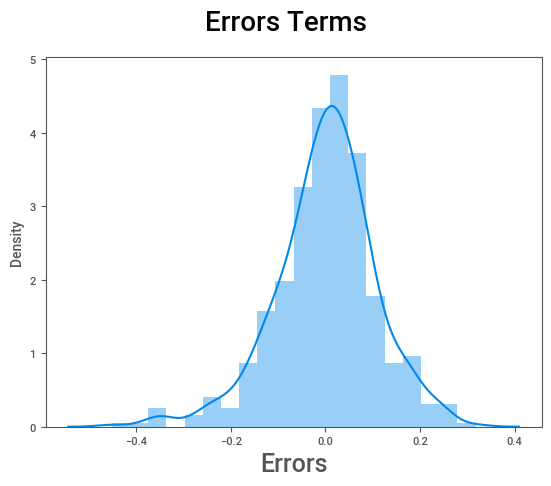

In [426]:
# plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train-y_train_cnt),bins=20)
fig.suptitle('Errors Terms', fontsize=20)
plt.xlabel('Errors', fontsize=18)

It is normally distributed and Centered around 0. 

**Absence of Multicollinearity**

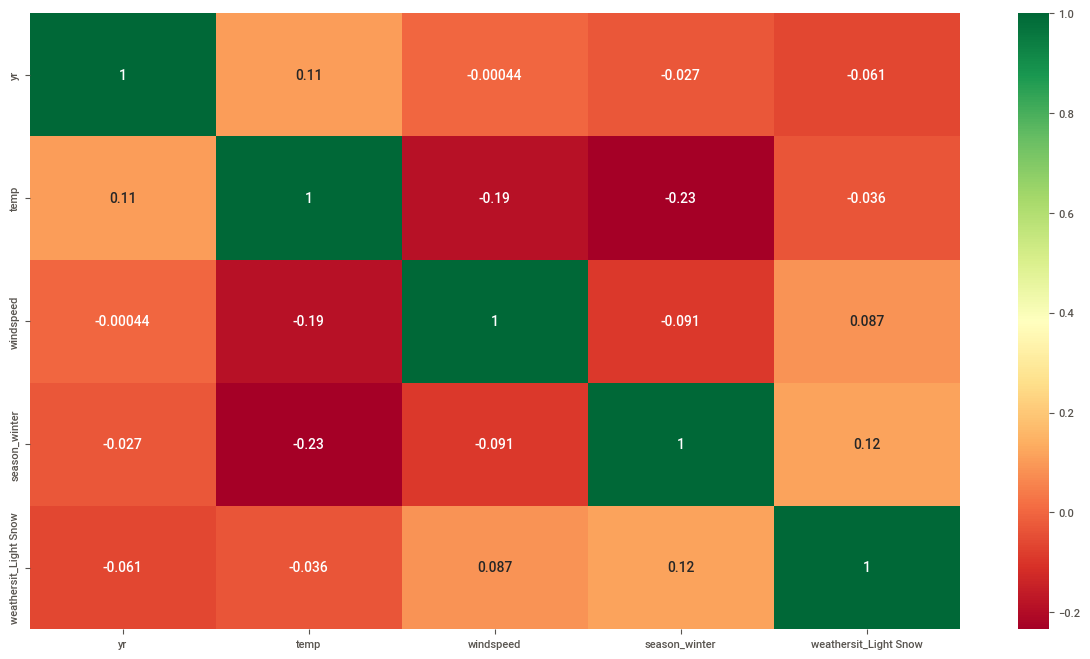

In [459]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

There is no multicollinearity seen between independent variables.

**Homoscedasticity**

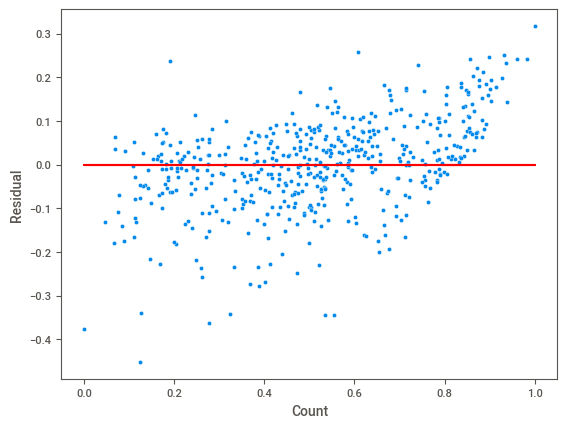

In [457]:
residual = y_train - y_train_cnt
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

There is no clear pattern in the distribution.

### Step 6 : Predictions and evaluations on the test set


**Apply the scaling on test dataset**

In [428]:
df_test.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_july', 'mnth_june',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_Light Snow',
       'weathersit_Mist'],
      dtype='object')

In [429]:
# create a list of numeric vars
num_vars = ['temp', 'hum', 'windspeed','cnt']

# Fit on data
df_test[num_vars] = scalar.transform(df_test[num_vars])

**Dividing into X_test and y_test**

In [433]:
y_test = df_test.pop('cnt')
X_test = df_test

In [434]:
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light Snow,weathersit_Mist
184,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.610133,0.153728,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.837699,0.334206,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.314298,0.537414,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [438]:
# Now lets use our model to make predictions.

# Creating a new X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]


In [439]:
X_test_new.head()

,yr,temp,windspeed,season_winter,weathersit_Light Snow
184,0,0.831783,0.084219,0,0
535,1,0.901354,0.153728,0,0
299,0,0.511964,0.334206,1,0
221,0,0.881625,0.339570,0,0
152,0,0.817246,0.537414,0,0


In [440]:
# Adding a constant variable
X_test_new = sm.add_constant(X_test_new)

In [441]:
X_test_new.head()

,const,yr,temp,windspeed,season_winter,weathersit_Light Snow
184,1.0,0,0.831783,0.084219,0,0
535,1.0,1,0.901354,0.153728,0,0
299,1.0,0,0.511964,0.334206,1,0
221,1.0,0,0.881625,0.339570,0,0
152,1.0,0,0.817246,0.537414,0,0


In [442]:
# Making Predictions
y_pred = lm5.predict(X_test_new)

**Model Evaluation**

Text(0, 0.5, 'y_pred')

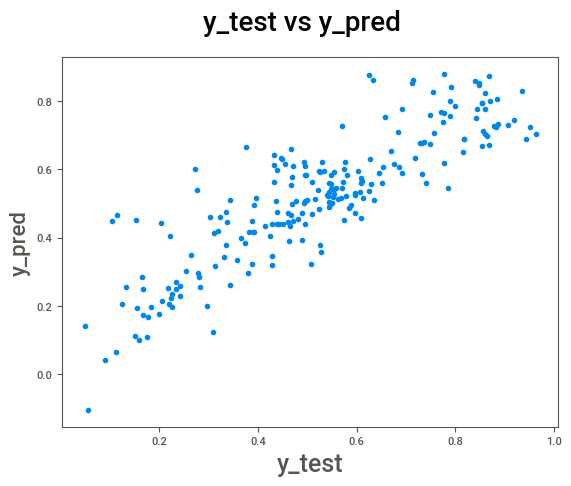

In [443]:
# Plotting y_test and y_pred to understand the spread.

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

In [453]:
# r2_score for 6 variables
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.7471256976999268

In [454]:
# Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)] 
# Where - 
# R2: The R2 of the model
# n: The number of observations
# k: The number of predictor variables
#print(X_test[X_train_new.columns].shape[0])
#print(X_test[X_train_new.columns].shape[1])

adj_r2_test = round(1-(1-r2)*(X_test[X_train_new.columns].shape[0]-1)/(X_test[X_train_new.columns].shape[0]-X_test[X_train_new.columns].shape[1]-1),4)
adj_r2_test

0.7412

## Final Observation

In [458]:
X_train_new.columns

Index(['yr', 'temp', 'windspeed', 'season_winter', 'weathersit_Light Snow'], dtype='object')

**R^2 and Adjusted R^2 of train and test dataset**

In [455]:
data = [["R^2","77.3%","74.7%"],["Adjusted R^2","77.1%","74.2%"]]
pd.DataFrame(data,columns=["","Train Dataset","Test Dataset"])

,,Train Dataset,Test Dataset
0,R^2,77.3%,74.7%
1,Adjusted R^2,77.1%,74.2%


The final model consists of below 5 features.
1. yr
2. temp
3. windspeed
4. season_winter
5. weathersit_Light Snow

This model looks Ok to predict daily bike rentals count.